In [1]:
from __future__ import print_function

import matplotlib  # library to analyse and visualise the data
%matplotlib inline
# magic func in python matplotlib inline sets the backend of matplotlib to the inline backend
# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook,
# directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.


import os
import numpy as np
import matplotlib.pyplot as plt # to plot graph
import matplotlib.image as image # to  show images

plt.style.use("ggplot")  # it is used to specify what type of style you want in matlpoltlib like css in html

from skimage import io   # to read and perform on input data
from sklearn.cluster import KMeans #to apply k-means algo 

from ipywidgets import interact,interactive,fixed,interact_manual,IntSlider # for sliders and dropdown bar
import ipywidgets as widgets


In [2]:
plt.rcParams['figure.figsize']=(20,12) # width=20 height =12 

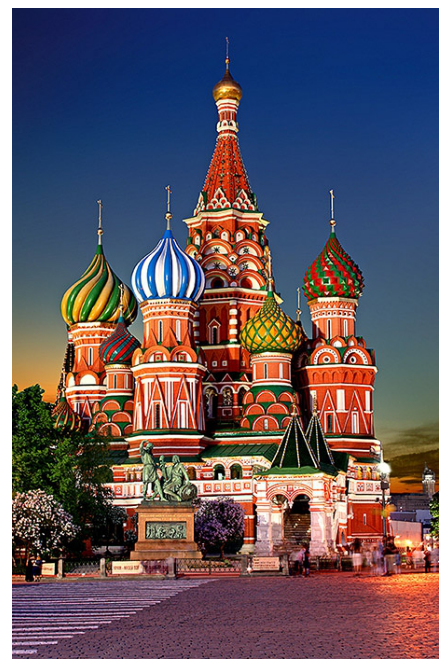

In [3]:
img=io.imread('/home/anubhav/Desktop/prack/imagecompression/images/Saint_Basils_Cathedral.jpg')
ax=plt.axes(xticks=[],yticks=[])# as this represent axis xticks and yticks shows value on axis and we dont want that
ax.imshow(img);# dont want to print reference thats why semicolon 

In [4]:
img.shape #pixels 

(700, 460, 3)

In [5]:
img_data=(img/255.0).reshape(-1,3) # resizing and -1 here is 700*460
img_data.shape

(322000, 3)

In [6]:
from plot_utils import plot_utils #plot_utils file

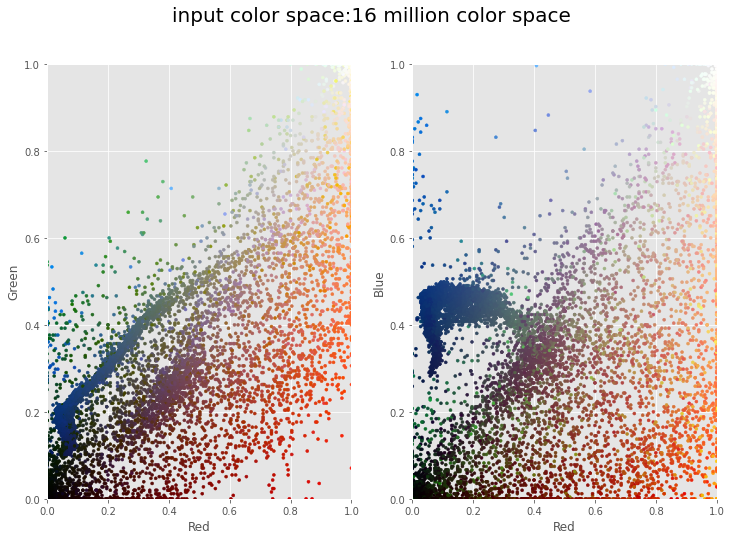

In [7]:
x=plot_utils(img_data,title="input color space:16 million color space") # using plot_utils
x.colorSpace() # 

In [8]:
from sklearn.cluster import MiniBatchKMeans

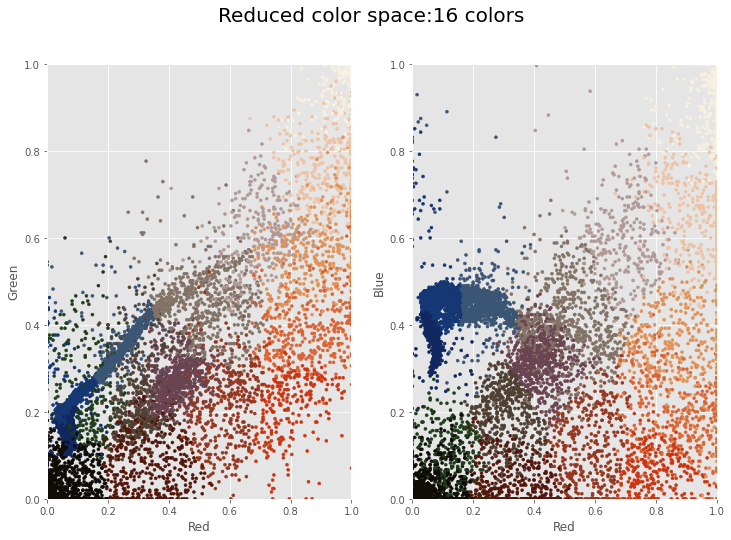

In [9]:
kmeans=MiniBatchKMeans(16).fit(img_data) #Applying k-means here k=16 and fit img data
k_colors=kmeans.cluster_centers_[kmeans.predict(img_data)] # here we have to predict data of img by our applied 
# kmeans using cluster centers

y=plot_utils(img_data,colors=k_colors,title='Reduced color space:16 colors')
y.colorSpace() #plot with 16 color

In [10]:
img_dir='/home/anubhav/Desktop/prack/imagecompression/images/'


In [11]:
@interact
# listdir help in slider making k is form min to max step means inc. one at a time default k=16 c
# continous  update is when you move the slider image doesnt change until you stop layout is line width
def color_compression(image=os.listdir(img_dir),k=IntSlider(min=1,max=256,step=1,value=16,continuous_update=False,layout=dict(width='100%'))):
    
    input_img=io.imread(img_dir+image)   #one chosen image
    img_data= (input_img/ 255.0).reshape(-1,3)
    
    kmeans=MiniBatchKMeans(k).fit(img_data)   # Applying K-means algorithm
    k_colors=kmeans.cluster_centers_[kmeans.predict(img_data)]
    
    k_img=np.reshape(k_colors, (input_img.shape))  # Compressing the image and replacing the pixels by their respective centroid colors
    
    fig,(ax1,ax2) =plt.subplots(1,2)  # To represent both figure side by side
    fig.suptitle('K-means image compression',fontsize=20) # title at top
    
    ax1.set_title('Compressed')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    
    ax2.set_title('Original')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top=0.85) # Adjusting the plot height from title
    plt.show()
    


interactive(children=(Dropdown(description='image', options=('min.jpeg', 'Saint_Basils_Cathedral.jpg', 'rang.j…